In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import *
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('criteo_sampled_data.csv')
data.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [3]:
cols = data.columns.values

dense_features = [f for f in cols if f.startswith('I')]
sparse_features = [f for f in cols if f.startswith('C')]

In [4]:
def process_dense_features(data, features):
    d = data.copy()
    d = d[features].fillna(0.)
    for f in features:
        d[f] = d[f].apply(lambda x: np.log(x + 1) if x > -1 else -1)
    return d
data_dense = process_dense_features(data, dense_features)

In [5]:
from sklearn.preprocessing import LabelEncoder
def process_sparse_features(data, features):
    d = data.copy()
    d = d[features].fillna('-1')
    for f in features:
        label_encoder = LabelEncoder()
        d[f] = label_encoder.fit_transform(d[f])
    return d
data_sparse = process_sparse_features(data, sparse_features)
data_sparse.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,470,261,203952,41641,38,6,8961,63,2,16515,...,9,3439,213,3,4954,0,3,24768,52,14364
1,470,498,90258,22218,38,13,5957,19,2,4195,...,0,2465,213,1,60664,0,3,8432,52,10835
2,170,24,2223,65253,38,6,8067,19,2,5767,...,6,738,0,0,143786,9,3,7344,0,0
3,470,93,137623,15635,38,13,1935,19,2,23623,...,1,1648,0,0,67107,0,3,18107,0,0
4,612,368,162265,83638,38,2,7067,19,2,8071,...,1,556,0,0,21257,0,2,22439,0,0


In [6]:
total_data = pd.concat([data_dense, data_sparse], axis=1)
total_data['label'] = data['label']

In [7]:
import tensorflow as tf

In [8]:
dense_inputs = []
for f in dense_features:
    _input = Input(shape=[1], name=f)
    dense_inputs.append(_input)
print(dense_inputs)

[<tf.Tensor 'I1:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I2:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I3:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I4:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I5:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I6:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I7:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I8:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I9:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I10:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I11:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I12:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'I13:0' shape=(None, 1) dtype=float32>]


In [9]:
concat_dense_inputs = Concatenate(axis=1)(dense_inputs)
first_order_dense_layer = Dense(1)(concat_dense_inputs)

In [10]:
sparse_inputs = []
for f in sparse_features:
    _input = Input(shape=[1], name=f)
    sparse_inputs.append(_input)
print(sparse_inputs)

[<tf.Tensor 'C1:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C2:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C3:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C4:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C5:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C6:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C7:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C8:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C9:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C10:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C11:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C12:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C13:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C14:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C15:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C16:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C17:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C18:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C19:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'C20:0' shape=(None, 1) dtyp

In [11]:
sparse_1d_embed = []
for i, _input in enumerate(sparse_inputs):
    f = sparse_features[i]
    voc_size = data[f].nunique()
    _embed = Flatten()(Embedding(voc_size+1, 1, embeddings_regularizer=tf.keras.regularizers.l2(0.5))(_input))
    sparse_1d_embed.append(_embed)

In [12]:
first_order_sparse_layer = Add()(sparse_1d_embed)
first_order_sparse_layer

<tf.Tensor 'add/Identity:0' shape=(None, 1) dtype=float32>

In [13]:
linear_part = Add()([first_order_dense_layer, first_order_sparse_layer])

In [14]:
D = 8
sparse_kd_embed = []
for i, _input in enumerate(sparse_inputs):
    f = sparse_features[i]
    voc_size = data[f].nunique()
    _embed = Embedding(voc_size+1, D, embeddings_regularizer=tf.keras.regularizers.l2(0.7))(_input)
    sparse_kd_embed.append(_embed)
dense_kd_embed = []
for i, _input in enumerate(dense_inputs):
    f = dense_features[i]
    _embed = tf.expand_dims(Dense(D, kernel_regularizer=tf.keras.regularizers.l2(0.7))(_input), axis=1)
    dense_kd_embed.append(_embed)
input_kd_embed = dense_kd_embed + sparse_kd_embed
input_feature_map = Concatenate(axis=1)(input_kd_embed)
input_feature_map.shape

TensorShape([None, 39, 8])

In [15]:
def compressed_interaction_net(x0, xl, D, h_k):
    x0_features = x0.get_shape()[1]
    xl_features = xl.get_shape()[1]

    xl = tf.reshape(xl, [-1, D, xl_features, 1])
    x0 = tf.reshape(x0, [-1, D, 1, x0_features])

    z = tf.matmul(xl, x0)
    reshaped_z = tf.reshape(z, [-1, D, x0_features * xl_features])
    output = Conv1D(h_k, 1, 1)(reshaped_z)
    output = tf.reshape(output, shape=(-1, h_k, D))
    return output

In [16]:
def build_cin(x0, D=8, T=3, h_k=12):
    cin_layers = []
    pooling_layers = []
    xl = x0
    for layer in range(T):
        xl = compressed_interaction_net(x0, xl, D, h_k)
        cin_layers.append(xl)

        pooling = Lambda(lambda x: K.sum(x, axis=-1))(xl)
        pooling_layers.append(pooling)

    output = Concatenate(axis=-1)(pooling_layers)
    return output

In [17]:
cin_layer = build_cin(input_feature_map)
cin_layer

<tf.Tensor 'concatenate_2/Identity:0' shape=(None, 36) dtype=float32>

In [18]:
embed_inputs = Flatten()(input_feature_map)
fc_layer = Dropout(0.5)(Dense(128, activation='relu')(embed_inputs))
fc_layer = Dropout(0.3)(Dense(128, activation='relu')(fc_layer))
fc_layer_output = Dropout(0.1)(Dense(128, activation='relu')(fc_layer))
fc_layer_output

<tf.Tensor 'dropout_2/Identity:0' shape=(None, 128) dtype=float32>

In [19]:
concat_layer = Concatenate()([linear_part, cin_layer, fc_layer_output])
output_layer = Dense(1, activation='sigmoid')(concat_layer)
output_layer

<tf.Tensor 'dense_17/Identity:0' shape=(None, 1) dtype=float32>

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
model = Model(dense_inputs+sparse_inputs, output_layer)

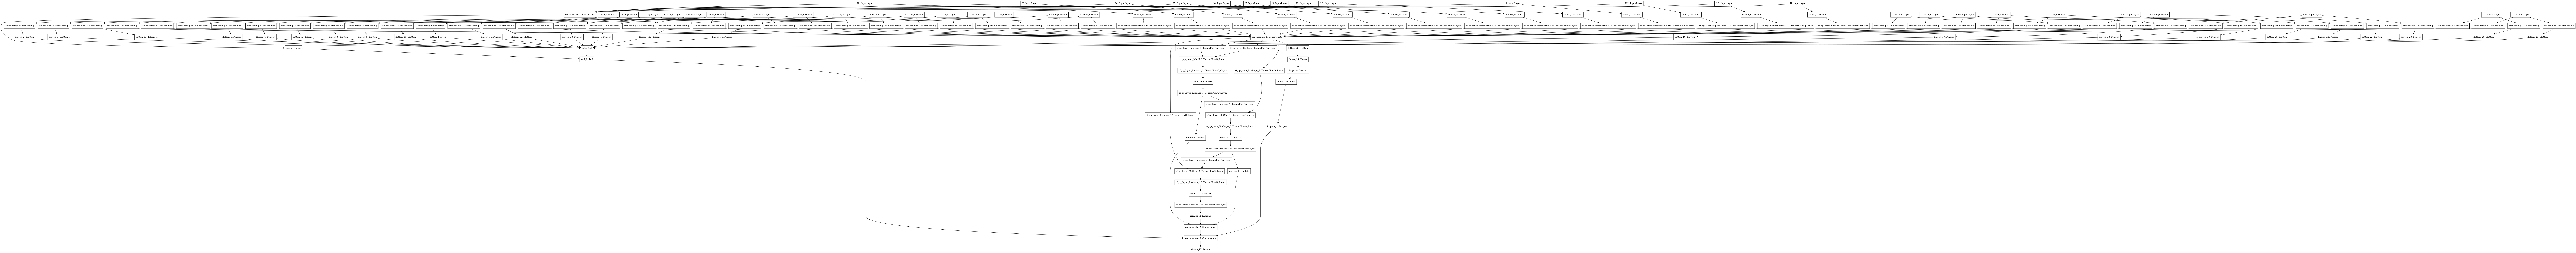

In [22]:
plot_model(model, "xdeepfm.png")

In [23]:
model.summary()

________________________
tf_op_layer_Reshape_5 (TensorFl [(None, 8, 1, 39)]   0           concatenate_1[0][0]              
__________________________________________________________________________________________________
tf_op_layer_MatMul_1 (TensorFlo [(None, 8, 12, 39)]  0           tf_op_layer_Reshape_4[0][0]      
                                                                 tf_op_layer_Reshape_5[0][0]      
__________________________________________________________________________________________________
tf_op_layer_Reshape_6 (TensorFl [(None, 8, 468)]     0           tf_op_layer_MatMul_1[0][0]       
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 8, 12)        5628        tf_op_layer_Reshape_6[0][0]      
__________________________________________________________________________________________________
tf_op_layer_Reshape_7 (TensorFl [(None, 12, 8)]      0           conv1d_1[0][0]     

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy', tf.keras.metrics.AUC(name='auc')])

In [25]:
from tensorflow.keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./logs',  
                 histogram_freq=0, 
                 write_graph=True, 
                 write_grads=True, 
                 write_images=True,
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)

In [26]:
total_data = total_data.sample(frac=1.0, random_state=1)
train_data = total_data.iloc[:500000]
val_data = total_data.iloc[500000:]

train_dense = [train_data[f] for f in dense_features]
train_sparse = [train_data[f] for f in sparse_features]

train_label = [train_data['label'].values]

val_dense = [val_data[f] for f in dense_features]
val_sparse = [val_data[f] for f in sparse_features]

val_label = [val_data['label'].values]

In [27]:
model.fit(
    train_dense + train_sparse,
    train_label, epochs=5, batch_size=256,
    validation_data=(val_dense + val_sparse, val_label),
    callbacks=[tbCallBack]
)

Train on 500001 samples, validate on 100000 samples
Epoch 1/5
156416/500001 [========>.....................] - ETA: 11:56 - loss: 110.4338 - binary_crossentropy: 0.6213 - auc: 0.6843

KeyboardInterrupt: 